In [1]:
!pip install git+https://github.com/rnelsonchem/pHcalc.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rnelsonchem/pHcalc.git to /tmp/pip-req-build-u4c0hatv
  Running command git clone --filter=blob:none --quiet https://github.com/rnelsonchem/pHcalc.git /tmp/pip-req-build-u4c0hatv
  Resolved https://github.com/rnelsonchem/pHcalc.git to commit 0deb203b08881266fcf9326cb656d8e36f61410e
  Preparing metadata (setup.py) ... done


In [2]:
from pHcalc.pHcalc import Acid, Neutral, System
import numpy as np
import matplotlib.pyplot as plt # Optional for plotting below

##pH of 0.01 M HCl

In [3]:
cl = Neutral(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 1.9999

1.9999977111816385


##pH of 1e-8 M HCl

In [4]:
cl = Neutral(charge=-1, conc=1e-8)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 6.978295898 (NOT 8!)

6.9782958984375005


##pH of 0.01 M NaOH

In [5]:
na = Neutral(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH) # Should print 12.00000

12.000002288818362


##pH of 0.01 M HF

In [6]:
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
# hf = Acid(pKa=3.17, charge=0, conc=0.01) will also work
system = System(hf)
system.pHsolve()
print(system.pH) # Should print 2.6413261

2.6413261413574203


##pH of 0.01 M H2CO3

In [7]:
carbonic = Acid(pKa=[3.6, 10.32], charge=0, conc=0.01)
system = System(carbonic)
system.pHsolve()
print(system.pH) # Should print 2.8343772

2.8343772888183576


##pH of 0.01 M NaF

In [8]:
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
na = Neutral(charge=1, conc=0.01)
system = System(hf, na)
system.pHsolve()
print(system.pH) # Should print 7.5992233

7.59922332763672


##pH of 0.01 M Alanine Zwitterion Form

In [9]:
ala = Acid(pKa=[2.35, 9.69], charge=1, conc=0.01)
system = System(ala)
system.pHsolve()
print(system.pH) # Should print 6.0991569

6.099156951904295


##pH of 0.01 M (NH4)3PO4

In [10]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
nh4 = Acid(pKa=9.25, charge=1, conc=0.01*3)
system = System(phos, nh4)
system.pHsolve()
print(system.pH) # Should print 8.95915298

8.95915298461914


##Distribution Diagrams

In [14]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phos.alpha(7.0) 
np.array([ 8.6055e-06, 6.1204e-01, 3.8795e-01, 1.8611e-06])
# This is H3PO4, H2PO4-, HPO4_2-, and HPO4_3-

array([8.6055e-06, 6.1204e-01, 3.8795e-01, 1.8611e-06])

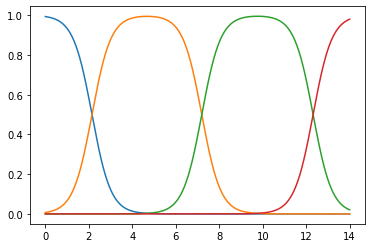

In [15]:
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
phs = np.linspace(0, 14, 1000)
fracs = phos.alpha(phs)
plt.plot(phs, fracs)
plt.show()

##Titration Curves

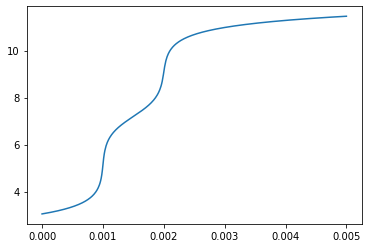

In [16]:
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
    na = Neutral(charge=1, conc=mol/sol_volume)
    system = System(phos, na)
    system.pHsolve(guess_est=True)
    phs.append(system.pH)
plt.plot(na_moles, phs)
plt.show()